<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/PROSTRATE_GLAND_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os


In [38]:
df=pd.read_csv("/content/drive/MyDrive/Prostate_Cancer.csv")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/Prostate_Cancer.csv")

In [6]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [7]:
df.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [10]:
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [11]:
df.drop(['id'],axis=1,inplace=True)

In [12]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


# diagnosis_result is the most important column for us. Because we'll classify datas depend on this column.
# We have to integers for classification. Therefore, we must convert them from object to integer.

In [13]:

df.diagnosis_result = [1 if each == 'M' else 0 for each in df.diagnosis_result]

In [14]:
df.diagnosis_result.value_counts()

,count
diagnosis_result,
1,62
0,38


In [15]:
y = df.diagnosis_result.values
x_data = df.drop(['diagnosis_result'],axis=1)

In [16]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [17]:
x_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [18]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x_data)

In [19]:
x

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
X_train

array([[0.5625    , 0.125     , 0.175     , 0.12350835, 0.34246575,
        0.05537459, 0.33727811, 0.13636364],
       [0.125     , 0.        , 0.23333333, 0.1575179 , 0.24657534,
        0.18241042, 0.34319527, 0.25      ],
       [0.0625    , 0.8125    , 0.375     , 0.26431981, 0.47945205,
        0.48534202, 0.53254438, 0.36363636],
       [0.125     , 0.        , 0.63333333, 0.53818616, 0.28767123,
        0.58957655, 0.56804734, 0.22727273],
       [0.5       , 0.625     , 0.24166667, 0.17959427, 0.38356164,
        0.04560261, 0.14201183, 0.09090909],
       [0.8125    , 0.5       , 0.375     , 0.27267303, 0.60273973,
        0.39739414, 0.56213018, 0.40909091],
       [0.9375    , 0.3125    , 0.28333333, 0.21539379, 0.16438356,
        0.07166124, 0.25443787, 0.06818182],
       [0.8125    , 0.1875    , 0.21666667, 0.14856802, 0.47945205,
        0.10749186, 0.32544379, 0.29545455],
       [1.        , 0.        , 0.26666667, 0.16348449, 0.67123288,
        0.65798046, 0.402366

In [22]:
method_names=[]
method_scores=[]

Logistic Regression Score:  0.8


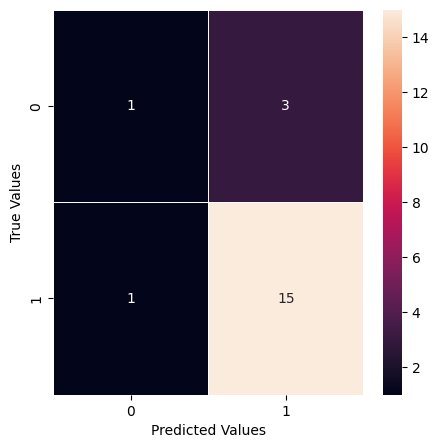

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
print("Logistic Regression Score: ",log_reg.score(X_test,y_test))

method_names.append("Logistic_Regression")
method_scores.append(log_reg.score(X_test,y_test))

#Confusion_Matrix
y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for KNN 0.8


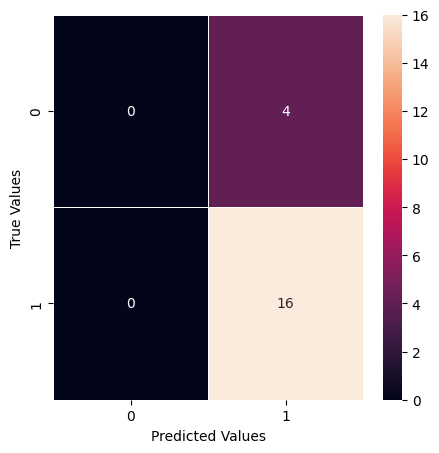

In [24]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print("Score for KNN",(knn.score(X_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(X_test,y_test))

#Confusion Matrix
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is:  0.8


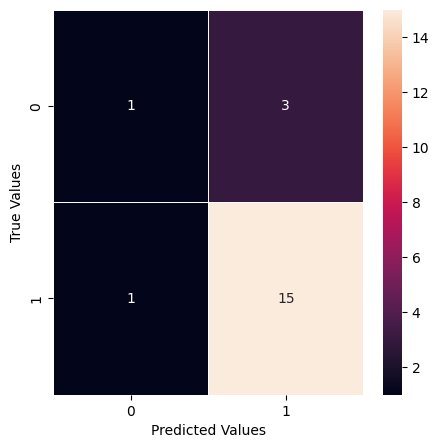

In [25]:
# SVM
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
print("SVM Classification Score is: ",(svm.score(X_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(X_test,y_test))

#Confusion Matrix
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score:  0.8


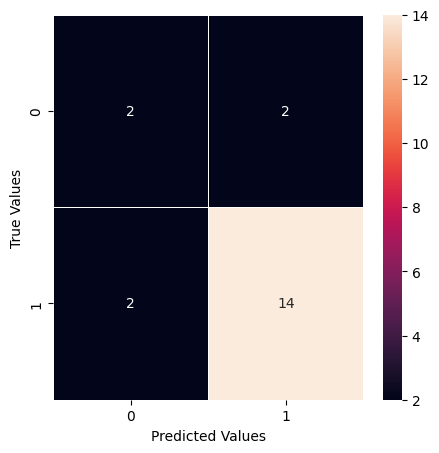

In [26]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
print("Naive Bayes Classification Score: ",(naive_bayes.score(X_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(X_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.65


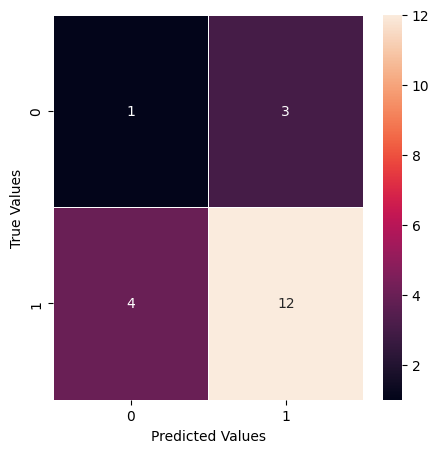

In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(X_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(X_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score:  0.75


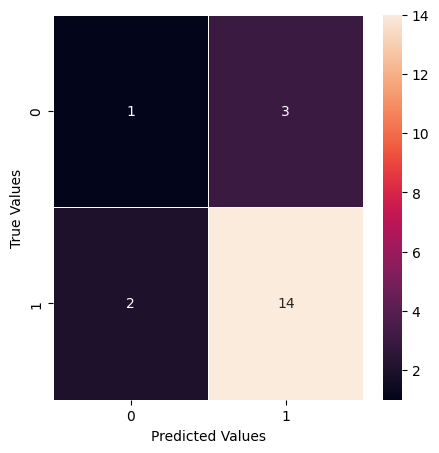

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(X_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [29]:
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
testX = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (80, 8, 1)
Shape of testX is (20, 8, 1)


In [30]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
# Add the first layer and Dropout regularization
model.add(Dense(units=100, activation='tanh', input_shape=(trainX.shape[1],)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(Dense(units=100, activation='tanh'))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(Dense(units=70, activation='tanh'))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(Dense(units=50, activation='tanh'))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainX, y_train, epochs=200, batch_size=32, validation_data=(testX, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(testX, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.4563 - loss: 0.5651 - val_accuracy: 0.8000 - val_loss: 0.1861
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6344 - loss: 0.3560 - val_accuracy: 0.8000 - val_loss: 0.1727
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6875 - loss: 0.2437 - val_accuracy: 0.7000 - val_loss: 0.1911
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7570 - loss: 0.1904 - val_accuracy: 0.7000 - val_loss: 0.2078
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7414 - loss: 0.1832 - val_accuracy: 0.7500 - val_loss: 0.2136
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7867 - loss: 0.1645 - val_accuracy: 0.8000 - val_loss: 0.2682
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8305 - loss: 0.1849 - val_accuracy: 0.8000 - val_loss: 0.2579
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7664 - loss: 0.1776 - val_accuracy: 0.8000 - val_loss

In [ ]:
method_names.append("ANN")
method_scores.append(0.80)

In [32]:
from keras.layers import Dense, SimpleRNN, Dropout
from keras.models import Sequential

model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100, activation='tanh', return_sequences=True,
                    input_shape=(trainX.shape[1], 1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units=100, activation='tanh', return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units=70, activation='tanh', return_sequences=True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units=50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainX, y_train, epochs=200, batch_size=32,validation_data=(testX,y_test))

# Extracting accuracies from history
accuracies = history.history['accuracy']

# Calculating mean and variance
mean = sum(accuracies) / len(accuracies)
variance = sum((x - mean) ** 2 for x in accuracies) / len(accuracies)

print("Accuracy mean:", mean)
print("Accuracy variance:", variance)

loss, accuracy = model.evaluate(testX, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.6383 - loss: 0.5954 - val_accuracy: 0.7500 - val_loss: 0.2325
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4938 - loss: 0.5331 - val_accuracy: 0.5000 - val_loss: 0.5916
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5758 - loss: 0.7774 - val_accuracy: 0.8000 - val_loss: 0.2617
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6750 - loss: 0.4970 - val_accuracy: 0.8000 - val_loss: 0.2705
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5828 - loss: 0.5648 - val_accuracy: 0.6500 - val_loss: 0.2280
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5484 - loss: 0.5907 - val_accuracy: 0.8000 - val_loss: 0.1471
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5547 - loss: 0.4605 - val_accuracy: 0.8000 - val_loss: 0.1520
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6250 - loss: 0.3736 - val_accuracy: 0.8000 - val_loss: 0.2012
Epo

In [33]:
method_names.append("RNN")
method_scores.append(0.85)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


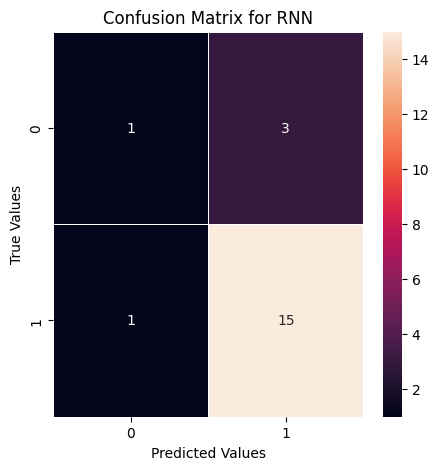

In [35]:
# prompt: plot confusion matrix for rnn

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and the predicted values from your RNN model
y_pred_rnn = model.predict(testX)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Create the confusion matrix
conf_mat_rnn = confusion_matrix(y_test, y_pred_rnn)

# Visualize the confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat_rnn, annot=True, linewidths=0.5, fmt=".0f", ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for RNN")
plt.show()


Text(0, 0.5, 'Method Score')

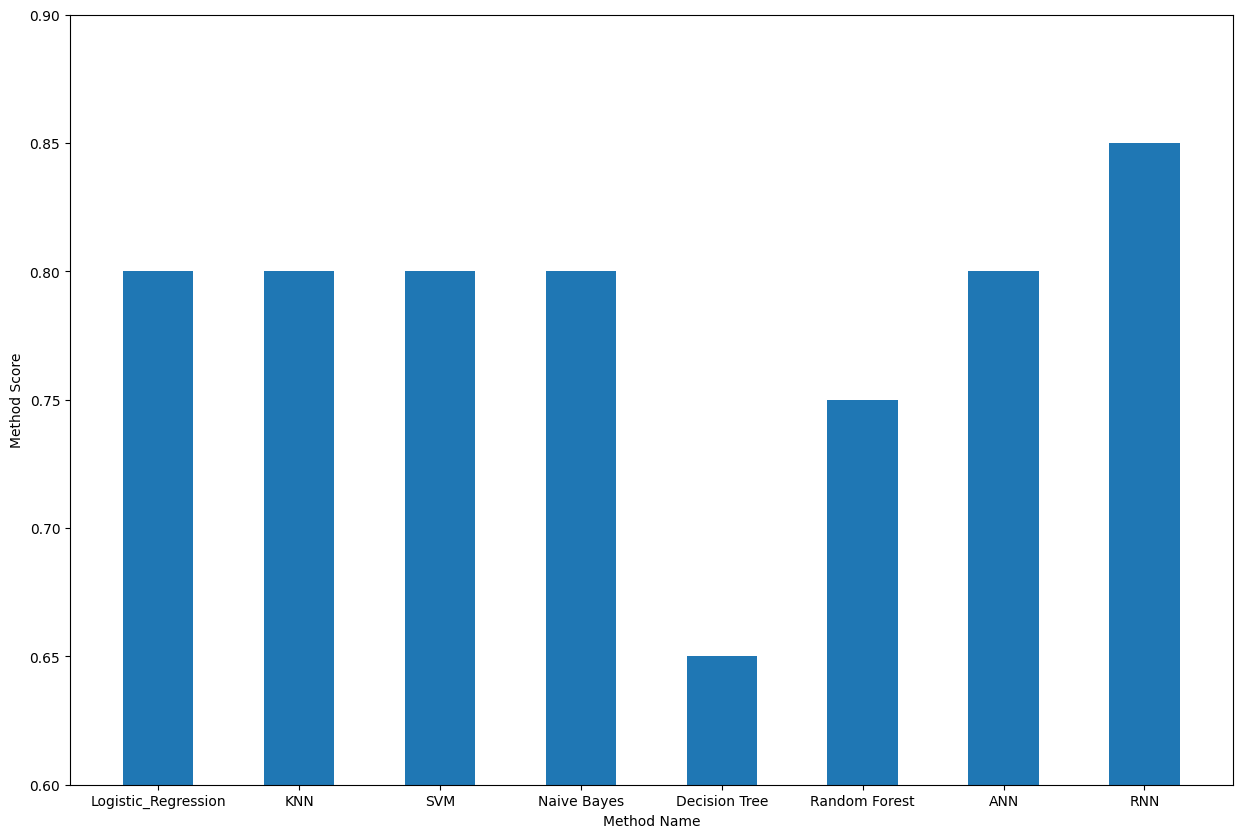

In [36]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')